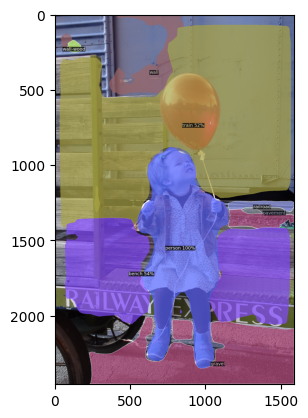

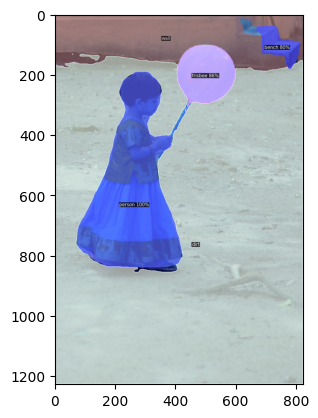

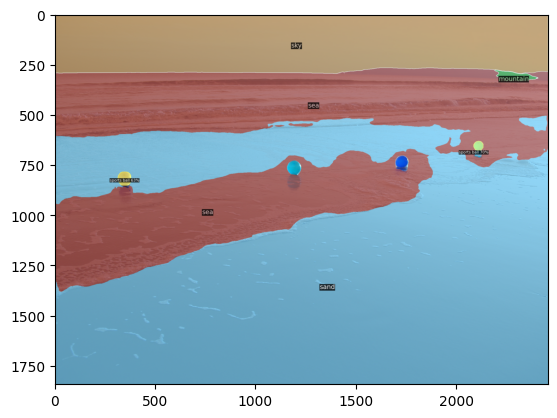

In [2]:
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import matplotlib.pyplot as plt
import random
import cv2
import os

list = []
path = "./balloon/val/"
for filename in os.listdir(path):
    if filename.endswith("jpg") or filename.endswith("png"):
        list.append(filename)

cfg = get_cfg()
cfg.merge_from_file(
    model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
)
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"
)
predictor = DefaultPredictor(cfg)
for i in random.sample(list, 3):
    im = cv2.imread(path + i)
    panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
    v = Visualizer(
        im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2
    )
    out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
    plt.figure()
    plt.imshow(out.get_image()[:, :, ::-1])
